In [3]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

In [4]:
image = cv2.imread('kitten.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 4

Для заданного изображения постройте гистограмму яркости. Выполните 
преобразование эквализации для этого изображения. Выведите изображение, которое 
получается после преобразования эквализации. 

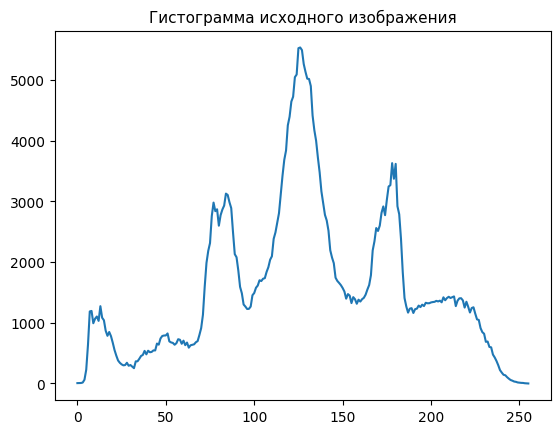

In [5]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_image)
hist = cv2.calcHist([hsv_image], [2], None, [256], [0, 255])
plt.plot(hist), plt.title('Гистограмма исходного изображения', fontsize=11)
plt.show() 

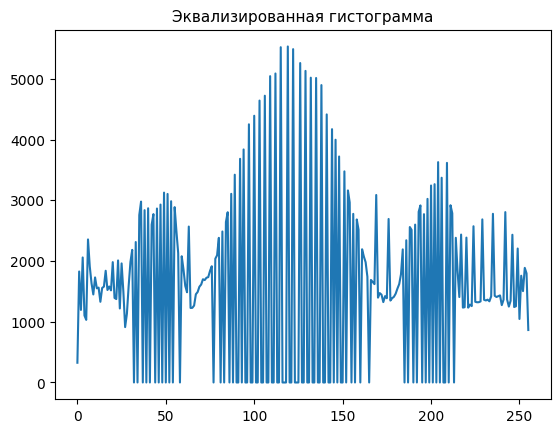

In [6]:
v_eq = cv2.equalizeHist(v)
image_eq = cv2.merge((h, s, v_eq))
result = cv2.cvtColor(image_eq, cv2.COLOR_HSV2RGB)
hist_eq = cv2.calcHist([image_eq], [2], None, [256], [0, 256])
plt.plot(hist_eq), plt.title('Эквализированная гистограмма', fontsize=11)
plt.show() 

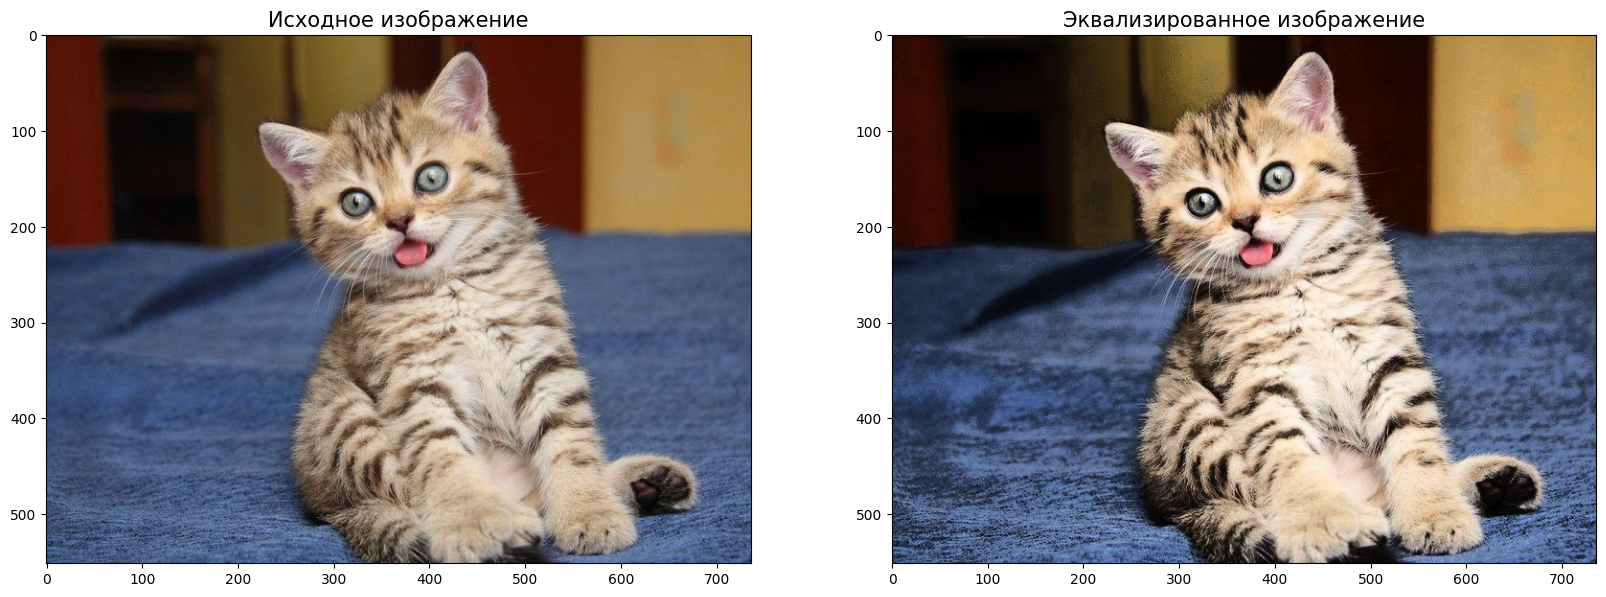

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(image), plt.title('Исходное изображение', fontsize=15)
plt.subplot(122), plt.imshow(result), plt.title('Эквализированное изображение', fontsize=15)
plt.show()

# 5

К какому эффекту на гистограмме приведет обнуление младшей битовой плоскости 
изображения? Как будет выглядеть гистограмма, если, наоборот, обнулить старшую 
битовую плоскость изображения? 

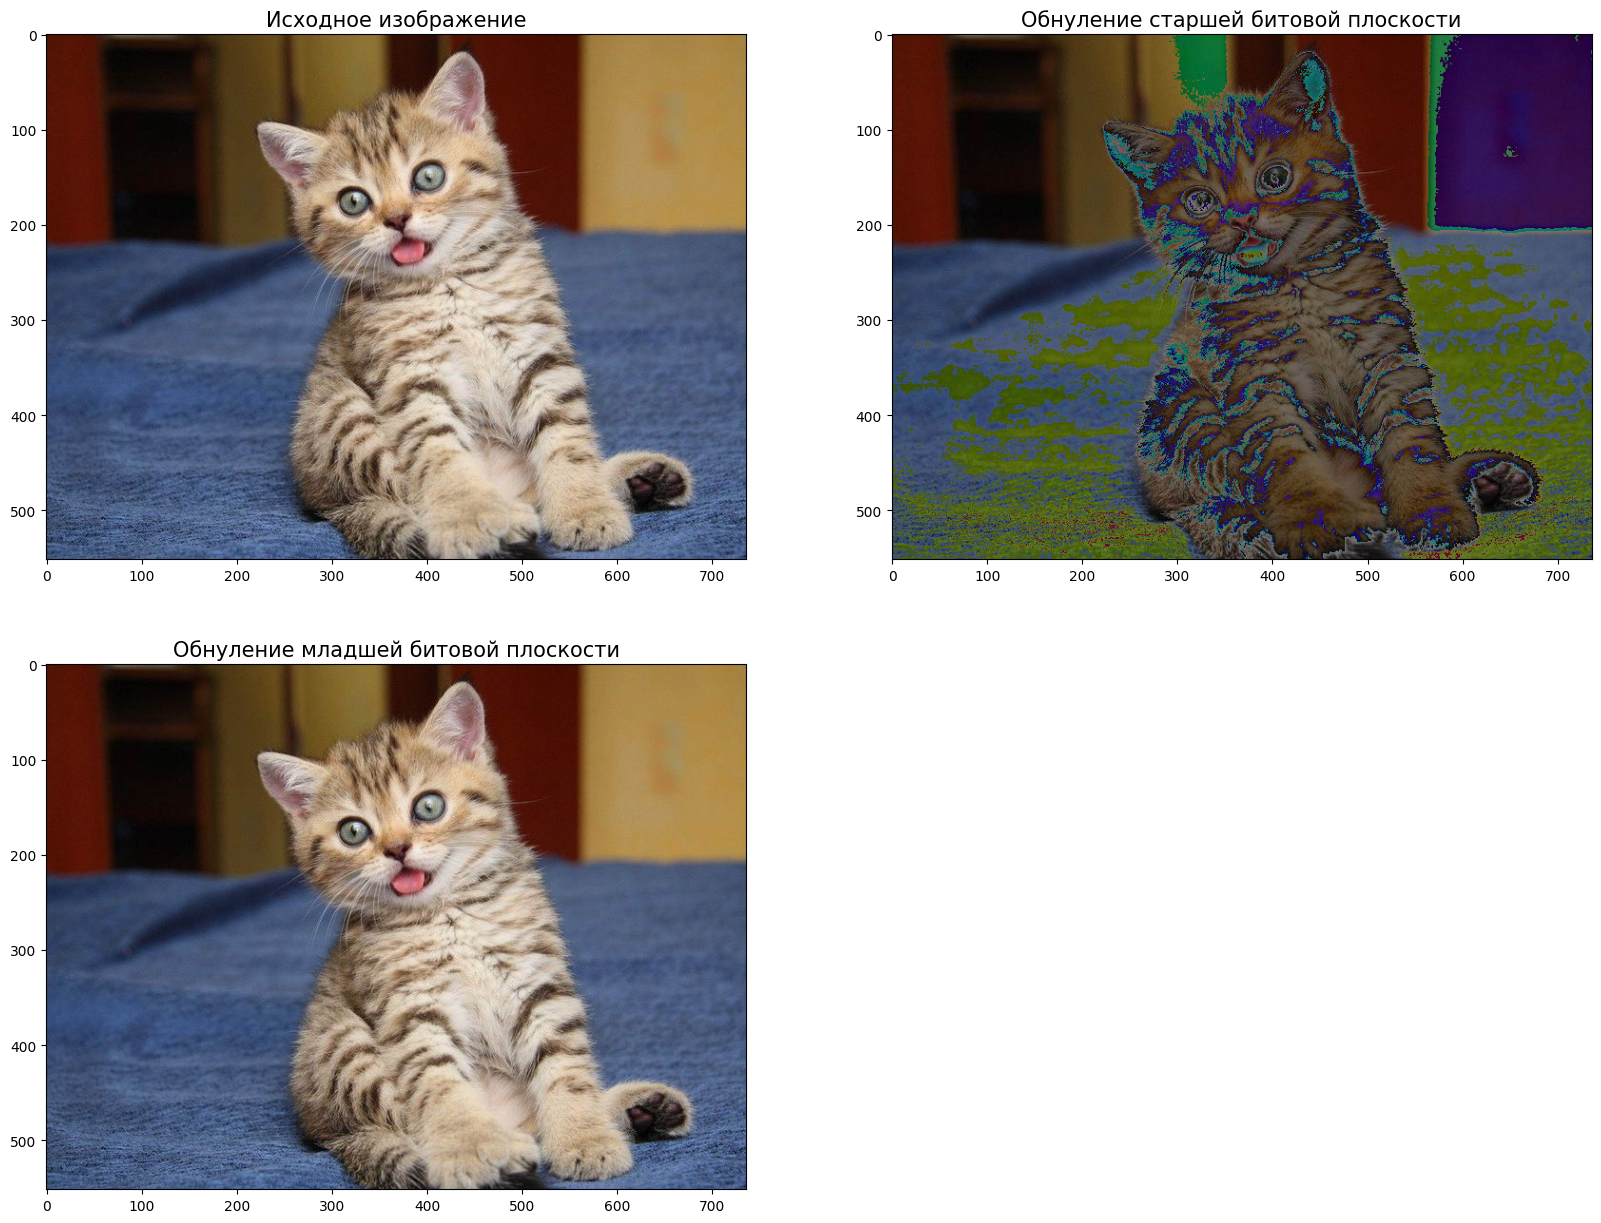

In [8]:
zero_high_bit = 0b01111111
zero_small_bit = 0b11111110

image_with_zero_high_bit = image & zero_high_bit
image_with_zero_small_bit = image & zero_small_bit

plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(image), plt.title('Исходное изображение', fontsize=15)
plt.subplot(222), plt.imshow(image_with_zero_high_bit), plt.title('Обнуление старшей битовой плоскости', fontsize=15)
plt.subplot(223), plt.imshow(image_with_zero_small_bit), plt.title('Обнуление младшей битовой плоскости', fontsize=15)
plt.show()

In [9]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_image_with_zero_small_bit = cv2.cvtColor(image_with_zero_small_bit, cv2.COLOR_RGB2GRAY)
gray_image_with_zero_high_bit = cv2.cvtColor(image_with_zero_high_bit, cv2.COLOR_RGB2GRAY) 

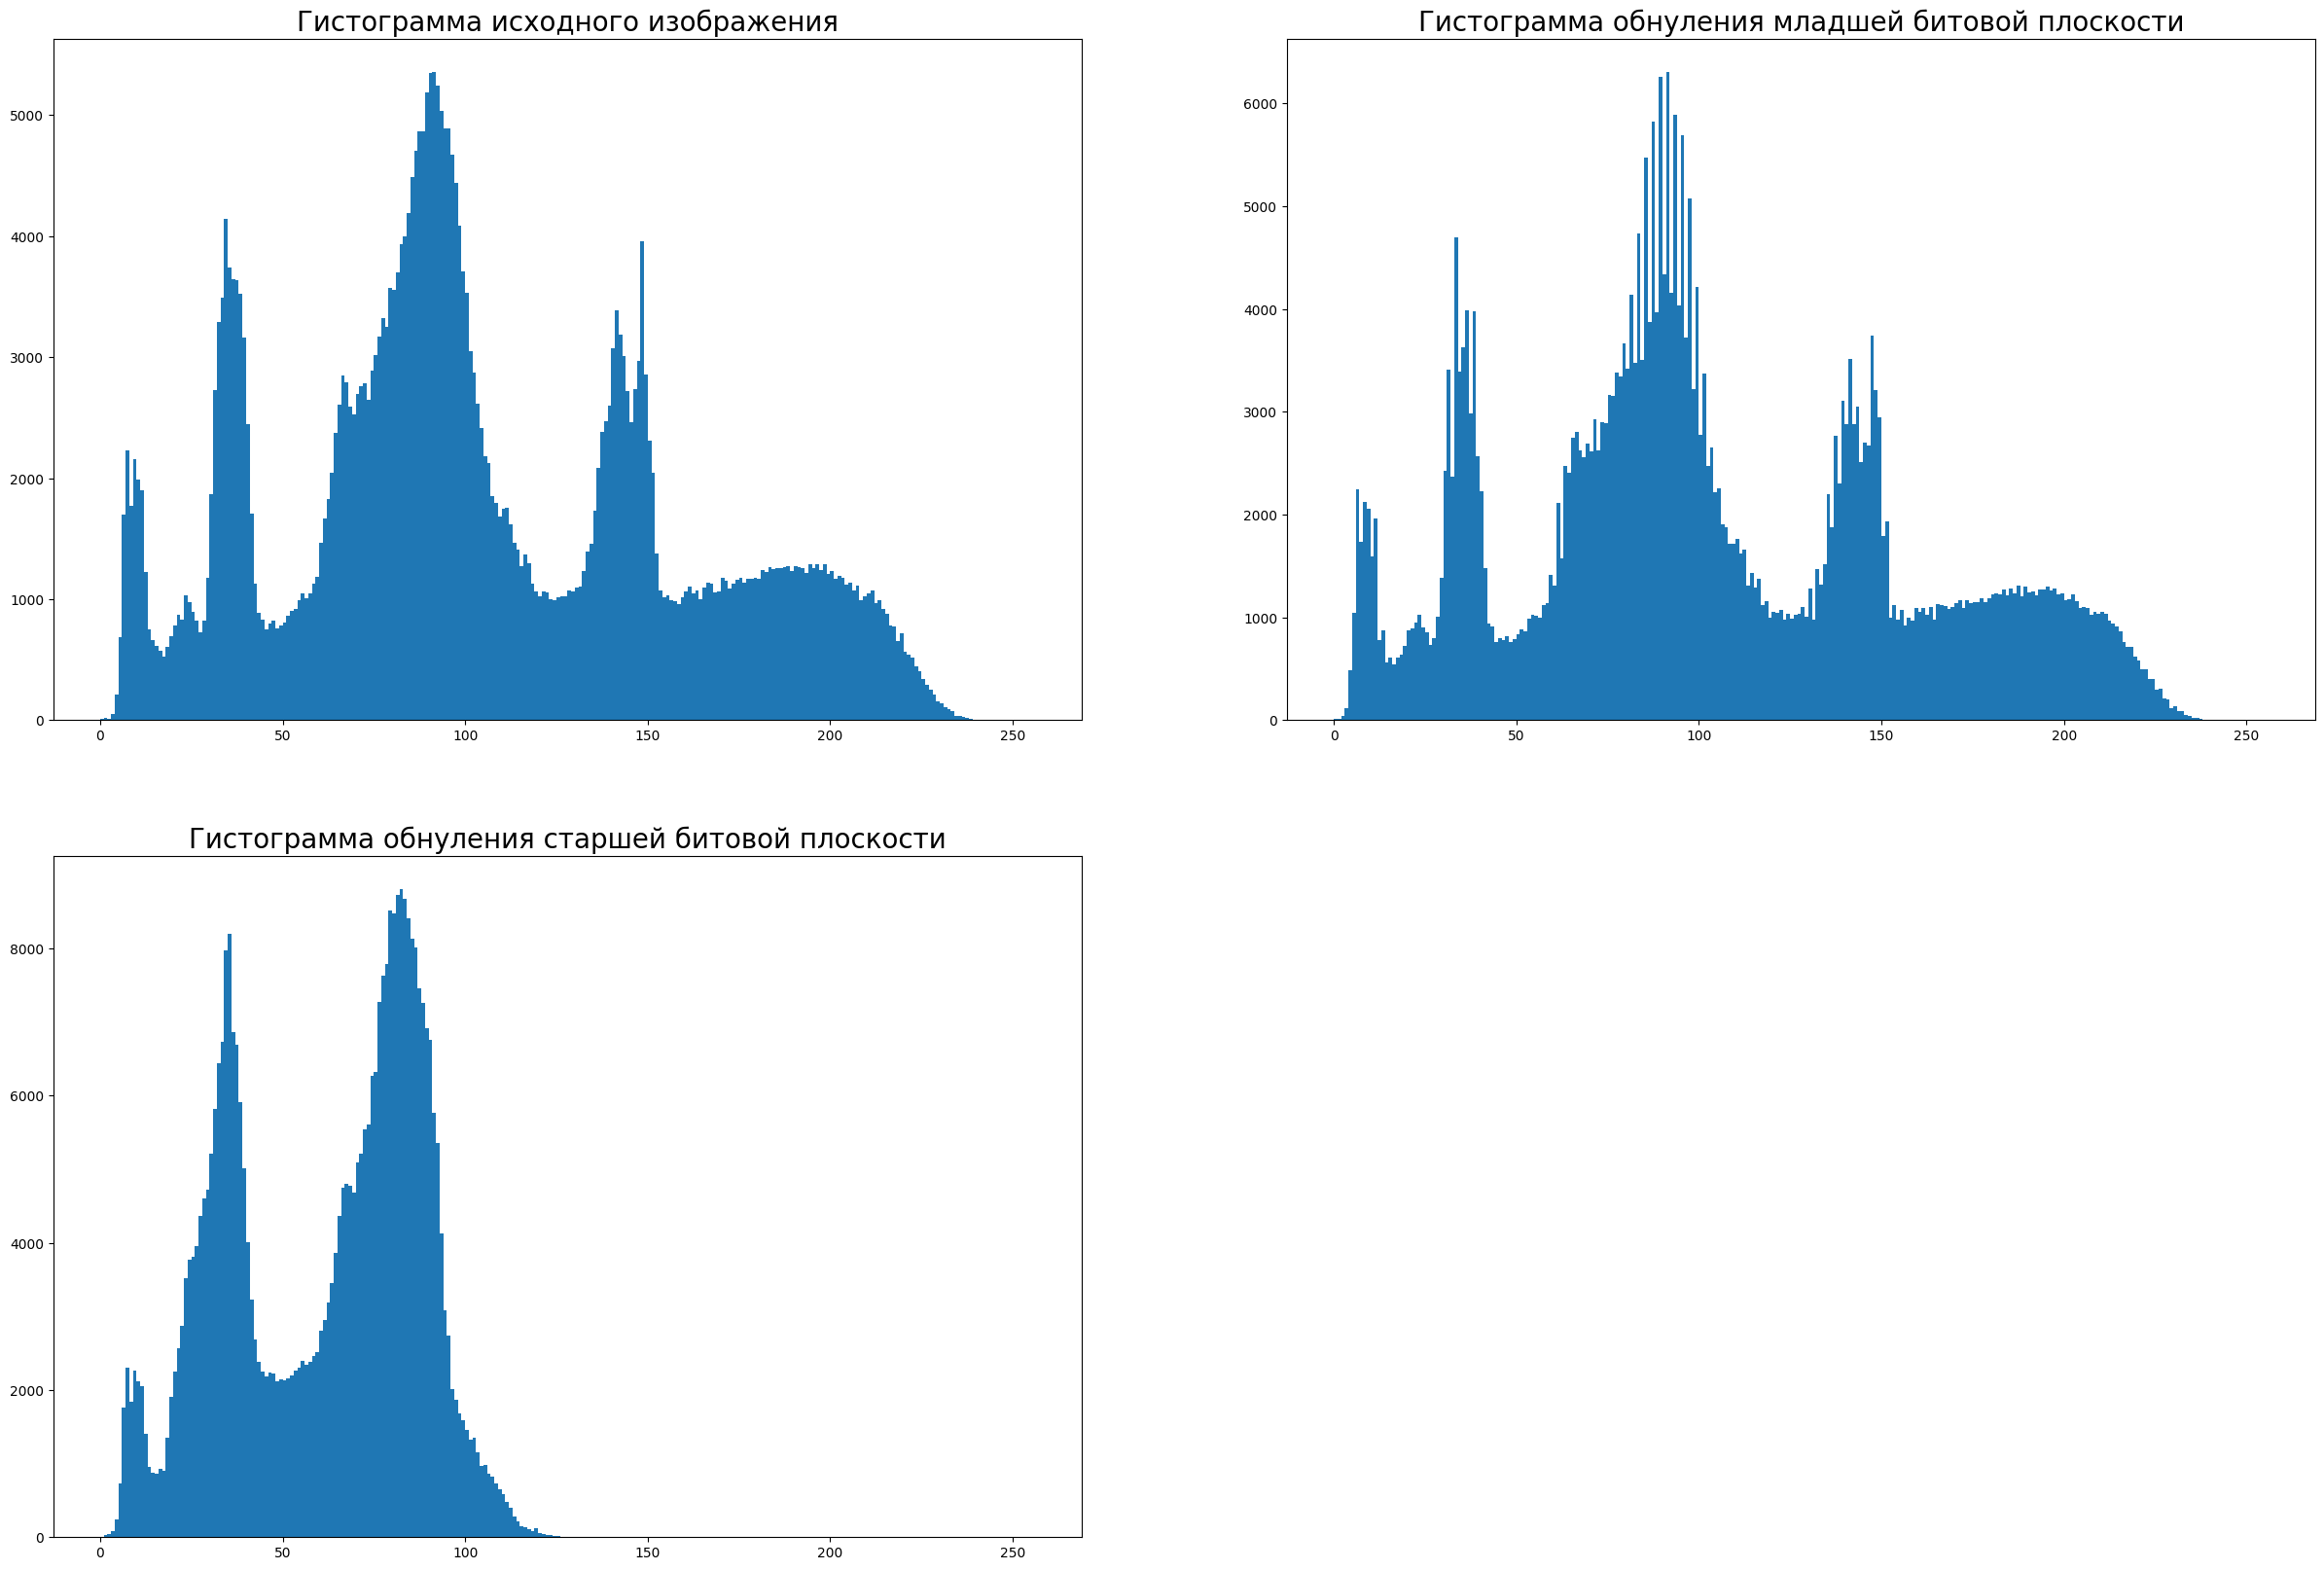

In [10]:
plt.figure(figsize=(30, 20))
plt.subplot(221)
plt.hist(gray_image.ravel(), bins=256, range=(0, 256)) 
plt.title('Гистограмма исходного изображения', fontsize=20)
plt.subplot(222)
plt.hist(gray_image_with_zero_small_bit.ravel(), bins=256, range=(0, 256)) 
plt.title('Гистограмма обнуления младшей битовой плоскости', fontsize=20)
plt.subplot(223)
plt.hist(gray_image_with_zero_high_bit.ravel(), bins=256, range=(0, 256))
plt.title('Гистограмма обнуления старшей битовой плоскости', fontsize=20)
plt.show()

# 6

 Используя функцию fft2 постройте Фурье-спектр для заданного изображения. 

(<Axes: title={'center': 'Фурье-спектр'}>,
 Text(0.5, 1.0, 'Фурье-спектр'))

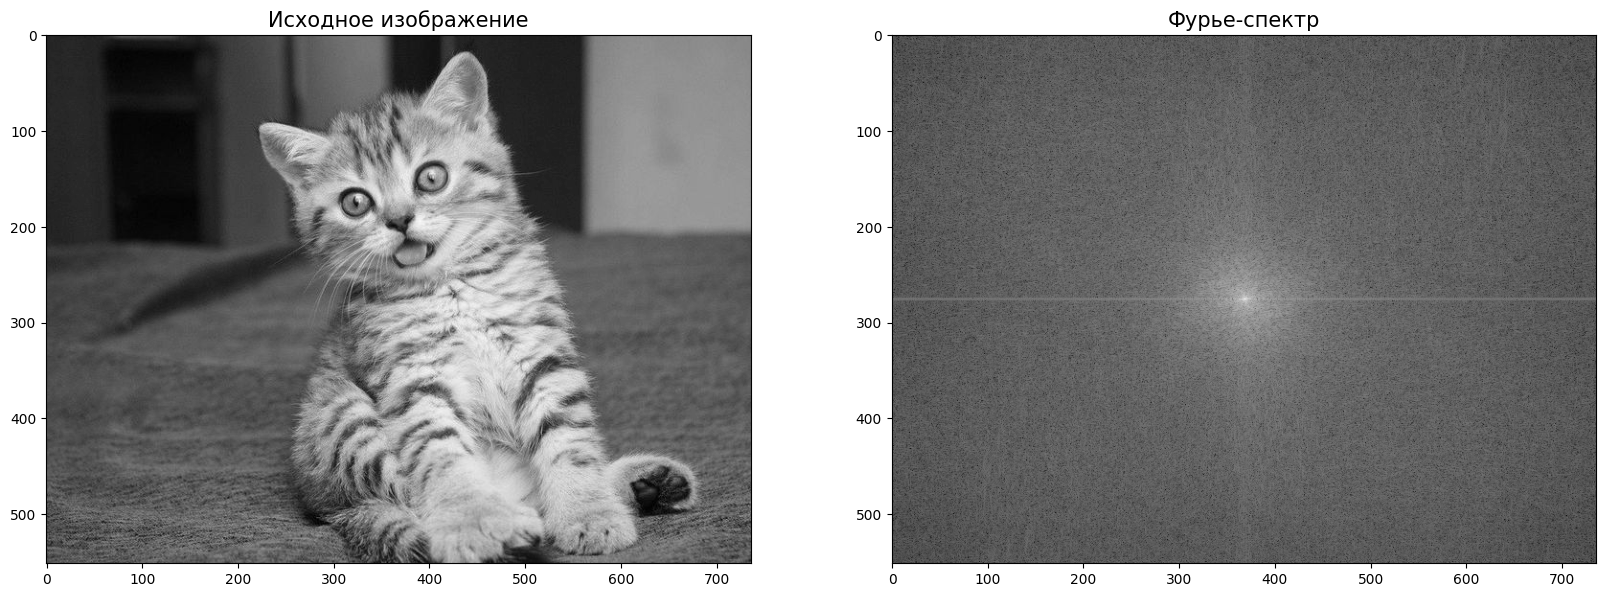

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_fft2 = np.fft.fft2(gray_image)
image_fshift = np.fft.fftshift(image_fft2)
result = np.log1p(np.abs(image_fshift))
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(gray_image, cmap='gray'), plt.title('Исходное изображение', fontsize=15)
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Фурье-спектр', fontsize=15)